#Model sellection is collabrative filtering based

Collaborative Filtering To address some of the limitations of content-based filtering, collaborative filtering uses similarities between users and items simultaneously to provide recommendations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 import numpy as np
 import pandas as pd

# Data engineering

In [ ]:
books = pd.read_csv('/content/drive/MyDrive/data/Books.csv')
user =pd.read_csv('/content/drive/MyDrive/data/Users.csv')
ratings =pd.read_csv('/content/drive/MyDrive/data/Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data preprocessing

In [ ]:
user.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# Data validation
data validation comes under Data preprocessing

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
books.duplicated().sum()


0

In [ ]:
user.duplicated().sum()

0

In [ ]:
ratings.duplicated().sum()

0

In [ ]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


#web page display popular book on frist page

In [ ]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [ ]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [ ]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [ ]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [ ]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [ ]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [ ]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


#Model engineering

In [ ]:


x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

pt.fillna(0,inplace=True)



#Model Building

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(pt)

similarity_scores.shape


def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data



#Model training


In [ ]:
pt.index[0]

'1984'

In [ ]:
pt.index[150]

'Divine Secrets of the Ya-Ya Sisterhood: A Novel'

In [ ]:
pt.index[660]

'Under the Tuscan Sun'

In [ ]:
pt.index[700]

'Wuthering Heights'

In [ ]:
pt.index[200]

"Fortune's Rocks : A Novel"

#Model testing

In [ ]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [ ]:
recommend('Animal Farm')

[['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/0451524934.01.MZZZZZZZ.jpg'],
 ['Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson',
  'Louise Rennison',
  'http://images.amazon.com/images/P/0064472272.01.MZZZZZZZ.jpg'],
 ['Midnight',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425118703.01.MZZZZZZZ.jpg'],
 ['Second Nature',
  'Alice Hoffman',
  'http://images.amazon.com/images/P/0399139087.01.MZZZZZZZ.jpg']]

In [ ]:
recommend('Second Nature')

[['Hearts in Atlantis',
  'Stephen King',
  'http://images.amazon.com/images/P/0743436210.01.MZZZZZZZ.jpg'],
 ['All the Pretty Horses (The Border Trilogy, Vol 1)',
  'CORMAC MCCARTHY',
  'http://images.amazon.com/images/P/0679744398.01.MZZZZZZZ.jpg'],
 ['Exclusive',
  'Sandra Brown',
  'http://images.amazon.com/images/P/0446604232.01.MZZZZZZZ.jpg'],
 ['Pop Goes the Weasel',
  'James Patterson',
  'http://images.amazon.com/images/P/0316693286.01.MZZZZZZZ.jpg']]

In [ ]:
recommend('Exclusive')

[['The Long Road Home',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0385319568.01.MZZZZZZZ.jpg'],
 ['Eyes of a Child',
  'Richard North Patterson',
  'http://images.amazon.com/images/P/0679429883.01.MZZZZZZZ.jpg'],
 ['Fine Things',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440200563.01.MZZZZZZZ.jpg'],
 ['Secrets',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440176484.01.MZZZZZZZ.jpg']]

#for model deployment

from flask import Flask,render_template,request
import pickle
import numpy as np


pt = pickle.load(open('pt.pkl','rb'))
books = pickle.load(open('books.pkl','rb'))
similarity_scores = pickle.load(open('similarity.pkl','rb'))

app = Flask(__name__)



@app.route('/')
def recommend_ui():
    return render_template('recommend.html')

@app.route('/recommend_books',methods=['post'])
def recommend():
    user_input = request.form.get('user_input')
    index = np.where(pt.index == user_input)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    print(data)

    return render_template('recommend.html',data=data)

if __name__ == '__main__':
    app.run(debug=True)

#Model outcome
searching this 1984 book the outcome is recommend for this books
* '1984'

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]



#Model validation

In [ ]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Model Analysis

In [ ]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

#Model Retraining

In [ ]:
pt.index[444]

'Small Town Girl'

In [ ]:
pt.index[499]

'The Carousel'

In [ ]:
pt.index[703]

'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values'

#Model Retesting

In [ ]:
recommend('Fine Things')

[['Kaleidoscope',
  'June Stepansky',
  'http://images.amazon.com/images/P/0884092097.01.MZZZZZZZ.jpg'],
 ['Zoya',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440203856.01.MZZZZZZZ.jpg'],
 ['Secrets',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440176484.01.MZZZZZZZ.jpg'],
 ['Message from Nam',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440209412.01.MZZZZZZZ.jpg']]

In [ ]:
recommend('Message from Nam')

[['The Long Road Home',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0385319568.01.MZZZZZZZ.jpg'],
 ['Dawn (Cutler)',
  'V.C. Andrews',
  'http://images.amazon.com/images/P/0671670689.01.MZZZZZZZ.jpg'],
 ['Kaleidoscope',
  'June Stepansky',
  'http://images.amazon.com/images/P/0884092097.01.MZZZZZZZ.jpg'],
 ['Fine Things',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440200563.01.MZZZZZZZ.jpg']]

In [ ]:
recommend('Kaleidoscope')

[['Fine Things',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440200563.01.MZZZZZZZ.jpg'],
 ['Message from Nam',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440209412.01.MZZZZZZZ.jpg'],
 ['Secrets',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440176484.01.MZZZZZZZ.jpg'],
 ['Zoya',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440203856.01.MZZZZZZZ.jpg']]

#Model redeployment

from flask import Flask,render_template,request
import pickle
import numpy as np

popular_df = pickle.load(open('popular.pkl','rb'))
pt = pickle.load(open('pt.pkl','rb'))
books = pickle.load(open('books.pkl','rb'))
similarity_scores = pickle.load(open('similarity.pkl','rb'))

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html',
                           book_name = list(popular_df['Book-Title'].values),
                           author=list(popular_df['Book-Author'].values),
                           image=list(popular_df['Image-URL-M'].values),
                           votes=list(popular_df['num_ratings'].values),
                           rating=list(popular_df['avg_rating'].values)
                           )

@app.route('/recommend')
def recommend_ui():
    return render_template('recommend.html')

@app.route('/recommend_books',methods=['post'])
def recommend():
    user_input = request.form.get('user_input')
    index = np.where(pt.index == user_input)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    print(data)

    return render_template('recommend.html',data=data)

if __name__ == '__main__':
    app.run(debug=True)

# Data Visualisation

[]

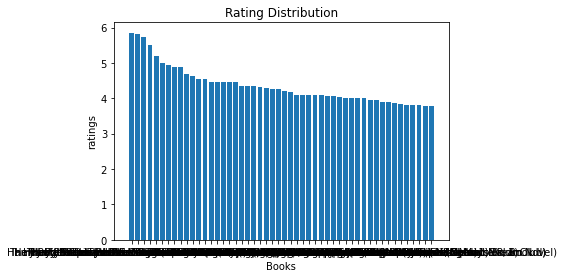

In [ ]:
import matplotlib.pyplot as plt

plt.rc("font", size = 10)


# Bar chart with day against tip
plt.bar(popular_df['Book-Title'],popular_df['avg_rating'])
plt.title('Rating Distribution')
plt.xlabel('Books')
plt.ylabel('ratings')
plt.plot()



#Gui


# index html tab

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Book Recommender System</title>
    <!-- Latest compiled and minified CSS -->
<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@3.3.7/dist/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">
</head>
<style>
    .text-white{
        color:white
    }
</style>
<body style="background-color:black">

    <nav class="navbar" style="background-color:#00a65a">
        <a class="navbar-brand">My Book recommender</a>
        <ul class="nav navbar-nav">
            <li><a href="/">Home</a></li>
            <li><a href="/recommend">Recommend</a></li>
            <li><a>Contact</a></li>
        </ul>
    </nav>

    <div class="container">
        <div class="row">
            <div class="col-md-12">
                <h1 class="text-white" style="font-size:50px">Top 50 Books</h1>
            </div>

            {% for i in range(book_name|length) %}
                <div class="col-md-3" style="margin-top:50px">
                    <div class="card">
                        <div class="card-body">
                            <img class="card-img-top" src="{{ image[i] }}">
                            <p class="text-white">{{ book_name[i] }}</p>
                            <h4 class="text-white">{{ author[i] }}</h4>
                            <h4 class="text-white">Votes - {{ votes[i] }}</h4>
                            <h4 class="text-white">Rating - {{ rating[i] }}</h4>
                        </div>
                    </div>
                </div>
            {% endfor %}


        </div>
    </div>

</body>
</html>

#recommend html tab

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Book Recommender System</title>
    <!-- Latest compiled and minified CSS -->
<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@3.3.7/dist/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">
</head>
<style>
    .text-white{
        color:white
    }
</style>
<body style="background-color:black">

    <nav class="navbar" style="background-color:#00a65a">
        <a class="navbar-brand">My Book recommender</a>
        <ul class="nav navbar-nav">
            <li><a href="/">Home</a></li>
            <li><a href="/recommend">Recommend</a></li>
            <li><a>Contact</a></li>
        </ul>
    </nav>

    <div class="container">
        <div class="row">
            <div class="col-md-12">
                <h1 class="text-white" style="font-size:50px">Recommend Books</h1>
                <form action="/recommend_books" method="post">
                    <input name="user_input" type="text" class="form-control"><br>
                    <input type="submit" class="btn btn-lg btn-warning">
                </form>
            </div>

            {% if data %}

             {% for i in data %}
                <div class="col-md-3" style="margin-top:50px">
                    <div class="card">
                        <div class="card-body">
                            <img class="card-img-top" src="{{i[2]}}">
                            <p class="text-white">{{i[0]}}</p>
                            <h4 class="text-white">{{i[1]}}</h4>
                        </div>
                    </div>
                </div>
             {% endfor %}

            {% endif %}




        </div>
    </div>

</body>
</html>

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))


In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

#Business Benifits

* Revenue
* Customer satisfaction
* Discovery our product

###Revenue:

 we can increase our profit using recomendation
in normal case the company appoint a person to recommend a product or the company spend money for ads
.suppose the company using recomender system they automaticaly recommand a product so we can earn more profit

###customer satisfaction:

 coustomer satisfaction plays important role in business because The company want to know the customer data based on the data the company recommend a perfect product to coustomer

### product discovery:

product discoery is nothing but it is method to discover new product to perfect customer


